In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [179]:
Rtrain = pd.read_excel(r'C:\Users\karti\OneDrive\Desktop\Analytics work\Restotrain.xlsx')
Rtest=pd.read_excel(r'C:\Users\karti\OneDrive\Desktop\Analytics work\Restotest.xlsx')

In [180]:
Rtrain.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [181]:
Rtest.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [182]:
print(Rtrain.shape)
print(Rtest.shape)

(12690, 9)
(4231, 8)


In [183]:
Rtrain.columns


Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [184]:
Rtrain.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [185]:
Rtrain['RATING'] = Rtrain['RATING'].astype('object')

Rtest['RATING'] = Rtest['RATING'].astype('object')

In [186]:
Rtrain['RATING'] = Rtrain['RATING'].replace({'-':0.0, 'NEW':5.0})
Rtest['RATING'] = Rtest['RATING'].replace({'-':0.0, 'NEW':5.0})

In [187]:
Rtrain['RATING'] = Rtrain['RATING'].astype(float) 

Rtest['RATING'] = Rtest['RATING'].astype(float)

In [188]:
Rtest.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [189]:
print(Rtrain['TITLE'].nunique())
print(Rtrain['RESTAURANT_ID'].nunique())
print(Rtrain['CUISINES'].nunique())
print(Rtrain['TIME'].nunique())
print(Rtrain['CITY'].nunique())
print(Rtrain['LOCALITY'].nunique())
print(Rtrain['RATING'].nunique())
print(Rtrain['VOTES'].nunique())

113
11892
4155
2689
359
1416
32
1847


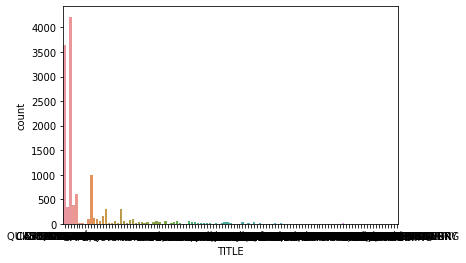

In [190]:
sns.countplot(Rtrain['TITLE'])

In [191]:

Rtrain['CITY'].value_counts()

Chennai                                         2174
Bangalore                                       2149
Hyderabad                                       1819
Mumbai                                          1722
New Delhi                                       1321
                                                ... 
Sector 51 Noida                                    1
MG Road Ernakulam                                  1
Kerala 682001 India                                1
Bangalore land mark above mahaveer hard ware       1
Gurgaon Haryana                                    1
Name: CITY, Length: 359, dtype: int64

In [192]:
Rtrain[Rtrain['CITY'] == 'New Delhi']['COST'].mean()

782.9825889477669

In [193]:
Rtrain[Rtrain['CITY'] == 'Bangalore']['COST'].mean()

668.733829688227

In [194]:
Rtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          12690 non-null  object 
 1   RESTAURANT_ID  12690 non-null  int64  
 2   CUISINES       12690 non-null  object 
 3   TIME           12690 non-null  object 
 4   CITY           12578 non-null  object 
 5   LOCALITY       12592 non-null  object 
 6   RATING         12688 non-null  float64
 7   VOTES          11486 non-null  object 
 8   COST           12690 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 892.4+ KB


In [195]:
Rtrain['source']= 'train'
Rtest['source'] = 'test'

In [196]:

df=pd.concat([Rtrain, Rtest],ignore_index=True)

In [197]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,train


In [198]:
Newrtest=df["VOTES"].str.split(" ", n = 1, expand =True)

In [199]:
df['votes_num'] = Newrtest[0]

In [200]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source,votes_num
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,train,49
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,train,30
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,train,221
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,train,24
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,train,165


In [201]:
df['votes_num'] = df['votes_num'].astype(float)

In [202]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1606
COST             4231
source              0
votes_num        1606
dtype: int64

In [203]:
print(df['votes_num'].mode())
print(df['RATING'].mode())
print(df['LOCALITY'].mode())
print(df['CITY'].mode())
print(df['COST'].mode())


0    44.0
dtype: float64
0    3.9
dtype: float64
0    Gachibowli
dtype: object
0    Chennai
dtype: object
0    300.0
dtype: float64


In [204]:
df['votes_num'] = df['votes_num'].astype(float)

In [205]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source,votes_num
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,train,49.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,train,30.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,train,221.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,train,24.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,train,165.0


In [206]:
df=df.drop('VOTES',axis=1)

In [207]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,COST,source,votes_num
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,1200.0,train,49.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,1500.0,train,30.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,800.0,train,221.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,800.0,train,24.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,300.0,train,165.0


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16921 non-null  object 
 1   RESTAURANT_ID  16921 non-null  int64  
 2   CUISINES       16921 non-null  object 
 3   TIME           16921 non-null  object 
 4   CITY           16774 non-null  object 
 5   LOCALITY       16793 non-null  object 
 6   RATING         16917 non-null  float64
 7   COST           12690 non-null  float64
 8   source         16921 non-null  object 
 9   votes_num      15315 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 1.3+ MB


In [209]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
COST             4231
source              0
votes_num        1606
dtype: int64

In [210]:
df['CITY'].fillna('Missing', inplace=True)  
df['LOCALITY'].fillna('Missing', inplace=True)  
df['RATING'].fillna(3.8, inplace=True)  
df['COST'].fillna(df['COST'].mean(), inplace=True)
df['votes_num'].fillna(df['votes_num'].mean(), inplace=True)

In [211]:
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
COST             0
source           0
votes_num        0
dtype: int64

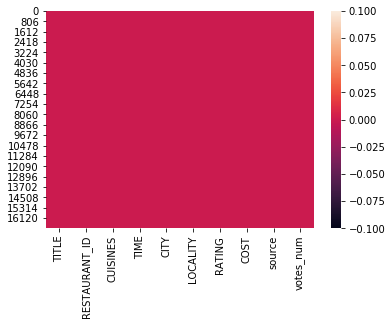

In [212]:
sns.heatmap(df.isnull())

In [213]:
df['COST'] = df['COST'].astype(float)

In [214]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,COST,source,votes_num
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,1200.0,train,49.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,1500.0,train,30.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,800.0,train,221.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,800.0,train,24.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,300.0,train,165.0


In [215]:
df.drop(['TIME'],inplace=True,axis=1)

In [216]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,COST,source,votes_num
0,CASUAL DINING,9438,"Malwani, Goan, North Indian",Thane,Dombivali East,3.6,1200.0,train,49.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,1500.0,train,30.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,800.0,train,221.0
3,QUICK BITES,6346,"Tibetan, Chinese",Mumbai,Bandra West,4.1,800.0,train,24.0
4,DESSERT PARLOR,15387,Desserts,Mumbai,Lower Parel,3.8,300.0,train,165.0


In [217]:
df.groupby('TITLE')['COST'].describe().sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
TITLE,,,,,,,,
"FINE DINING,BAR",36.0,2583.916916,999.412161,655.252246,2075.000000,2500.0,3000.0,5000.0
"BAR,MICROBREWERY",1.0,2500.000000,NaN,2500.000000,2500.000000,2500.0,2500.0,2500.0
FINE DINING,406.0,2402.868769,1544.884303,350.000000,1025.000000,2350.0,3000.0,14000.0
"COCKTAIL BAR,CASUAL DINING",4.0,2288.813061,1342.223849,655.252246,1513.813061,2400.0,3175.0,3700.0
COCKTAIL BAR,3.0,2266.666667,251.661148,2000.000000,2150.000000,2300.0,2400.0,2500.0
...,...,...,...,...,...,...,...,...
"QUICK BITES,FOOD TRUCK",1.0,150.000000,NaN,150.000000,150.000000,150.0,150.0,150.0
"BEVERAGE SHOP,FOOD COURT",1.0,150.000000,NaN,150.000000,150.000000,150.0,150.0,150.0
"KIOSK,QUICK BITES",2.0,150.000000,0.000000,150.000000,150.000000,150.0,150.0,150.0


In [218]:
df.head()


,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,COST,source,votes_num
0,CASUAL DINING,9438,"Malwani, Goan, North Indian",Thane,Dombivali East,3.6,1200.0,train,49.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,1500.0,train,30.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,800.0,train,221.0
3,QUICK BITES,6346,"Tibetan, Chinese",Mumbai,Bandra West,4.1,800.0,train,24.0
4,DESSERT PARLOR,15387,Desserts,Mumbai,Lower Parel,3.8,300.0,train,165.0


In [219]:
from sklearn.preprocessing import LabelEncoder
catcols= ('CUISINES','LOCALITY', 'TITLE', 'CITY')
for c in catcols:
    le = LabelEncoder() 
    le.fit(list(df[c].values)) 
    df[c] = le.transform(list(df[c].values))

In [220]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,COST,source,votes_num
0,34,9438,3294,401,328,3.6,1200.0,train,49.0
1,36,13198,364,75,1215,4.2,1500.0,train,30.0
2,34,10915,3729,75,1273,3.8,800.0,train,221.0
3,104,6346,5156,278,161,4.1,800.0,train,24.0
4,55,15387,2218,278,709,3.8,300.0,train,165.0


In [221]:
Train = df.loc[df['source']=='train']
Test = df.loc[df['source']=='test']

In [222]:
Train.drop('source',axis=1,inplace=True)
Test.drop(['source','COST'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [223]:

Train.head()

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,COST,votes_num
0,34,9438,3294,401,328,3.6,1200.0,49.0
1,36,13198,364,75,1215,4.2,1500.0,30.0
2,34,10915,3729,75,1273,3.8,800.0,221.0
3,104,6346,5156,278,161,4.1,800.0,24.0
4,55,15387,2218,278,709,3.8,300.0,165.0


In [224]:
Test.head()

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,votes_num
12690,34,4085,3878,324,1315,4.3,564.0
12691,104,12680,4879,278,429,4.2,61.0
12692,34,1411,4333,278,774,3.8,350.0
12693,95,204,631,128,847,3.8,1445.0
12694,104,13453,4891,216,570,3.6,23.0


In [225]:
X = Train.drop('COST', axis=1)
y = Train['COST']

In [226]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [227]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [229]:
from sklearn.ensemble import RandomForestRegressor
RGR = RandomForestRegressor()
RGR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [230]:
y_pred = RGR.predict(X_test)

In [231]:
RGR.score(X_train, y_train)

0.9592102043613301

In [232]:
RGR.score(X_test, y_test)

0.7128578615652555

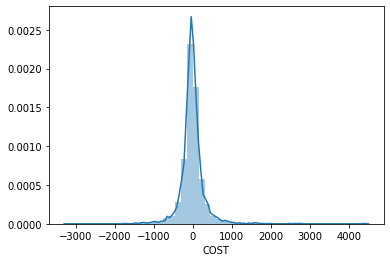

In [233]:
sns.distplot(y_test-y_pred)
plt.show()

In [234]:
from sklearn import metrics

In [235]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 186.22664302600472
MSE: 103342.41897446808
RMSE: 321.4691571122618


In [236]:
from sklearn.linear_model import LinearRegression

In [237]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [238]:
reg.score(X_train, y_train)

0.1465696439848171

In [239]:
RGR.score(X_test, y_test)

0.7128578615652555

In [241]:
Y_Pred = reg.predict(X_test)
Y_Pred

array([ 489.58035462,  567.36778497,  922.0468429 , ...,  416.0634986 ,
        395.12193598, 1151.68285612])

In [242]:
mse = mean_squared_error(y_test, Y_Pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, Y_Pred))

RMSE : 549.9402695712545
Variance score: 0.16


In [243]:
from sklearn.linear_model import Ridge

In [244]:
r = Ridge()

In [245]:
r.fit(X, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [247]:
x_test = Test

In [248]:
test_pred = r.predict(x_test)

In [249]:
Predict=np.exp(test_pred)
Predict=Predict.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


In [250]:
a =pd.DataFrame(Predict, columns=['COST'])

In [251]:
a

,COST
0,-2147483648
1,-2147483648
2,-2147483648
3,-2147483648
4,-2147483648
...,...
4226,-2147483648
4227,-2147483648
4228,-2147483648
4229,-2147483648


In [263]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor


In [264]:
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [265]:
DT.score(X_train, y_train)

1.0

In [266]:
DT.score(X_test, y_test)

0.30846619572928247

In [267]:
Y_Predict = DT.predict(X_test)
Y_Predict

array([350., 500., 800., ..., 400., 400., 600.])

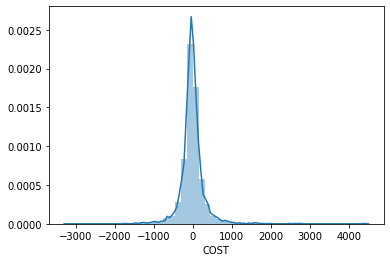

In [268]:
sns.distplot(y_test-y_pred)
plt.show()

In [273]:
GB = GradientBoostingRegressor()
GB.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [274]:
GB.score(X_train, y_train)

0.716055880165719

In [276]:
GB.score(X_test, y_test)

0.7172809307001375

In [278]:
Y_Prediction = GB.predict(X_test)
Y_Prediction

array([411.20689164, 312.22599642, 836.20654356, ..., 365.32737211,
       249.57275132, 633.62103915])

In [279]:
mse = mean_squared_error(y_test, Y_Prediction)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, Y_Prediction))

RMSE : 318.98363117461713
Variance score: 0.72


# Between the above models Randomforestregressor fits the model the best